# 12 Drams of Christmas Analysis

Step 1 is just to load the data and clean it up a bit:

In [26]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# some plotting config:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [15, 10]




# load data
dram_data = pd.read_csv('12 Drams - 2021 - Sheet1.csv')
# rearrange the data into a format more amenable for plotting:
dram_data = pd.melt(dram_data, id_vars=["Drammer", "Day", "Dram"], var_name='Dramee')
# get rid of non-numeric values:
# first try and convert all scores to numeric data
dram_data.value =pd.to_numeric(dram_data.value, errors='coerce')
# get rid of all nan values:
dram_data = dram_data[dram_data['value'].notna()]
dram_data = dram_data[dram_data['Drammer'].notna()]
# finally, because names are can be too trim them
dram_data.Dram = dram_data.Dram.apply(lambda x: x[0:9])
dram_data.Dramee = dram_data.Dramee.apply(lambda x: x[0:9])

Now the data is in an ameneable formats, let's make a few plots:

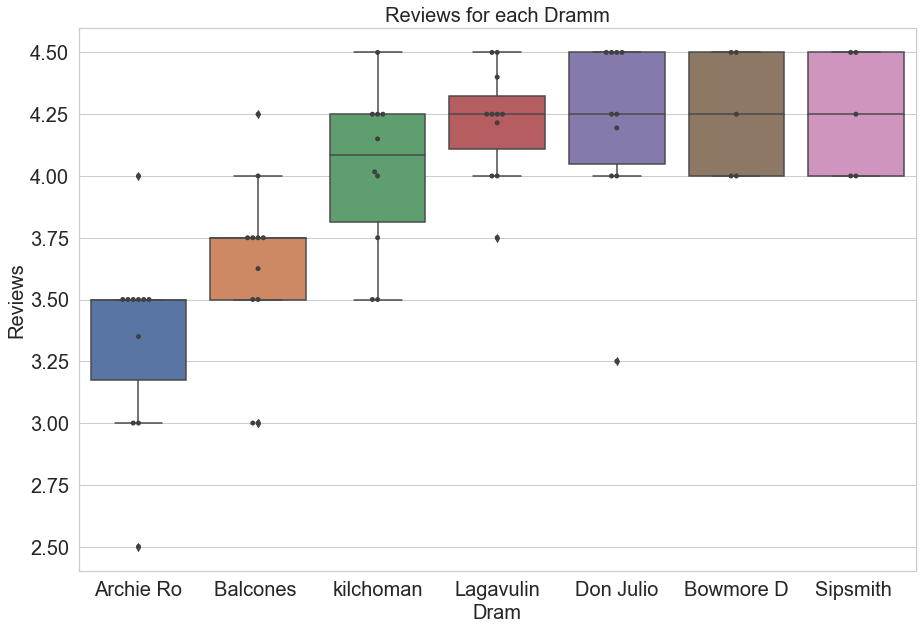

In [27]:
# distribution of each drams reviews
plt.figure()
ax = sns.boxplot(data=dram_data, x='Dram', y='value')
ax = sns.swarmplot(x="Dram", y="value", data=dram_data, color=".25")
ax.set_xlabel('Dram', fontsize=20)
ax.set_ylabel('Reviews', fontsize=20)
ax.tick_params(labelsize=20)
ax.set_title('Reviews for each Dramm', fontsize=20)
plt.show()

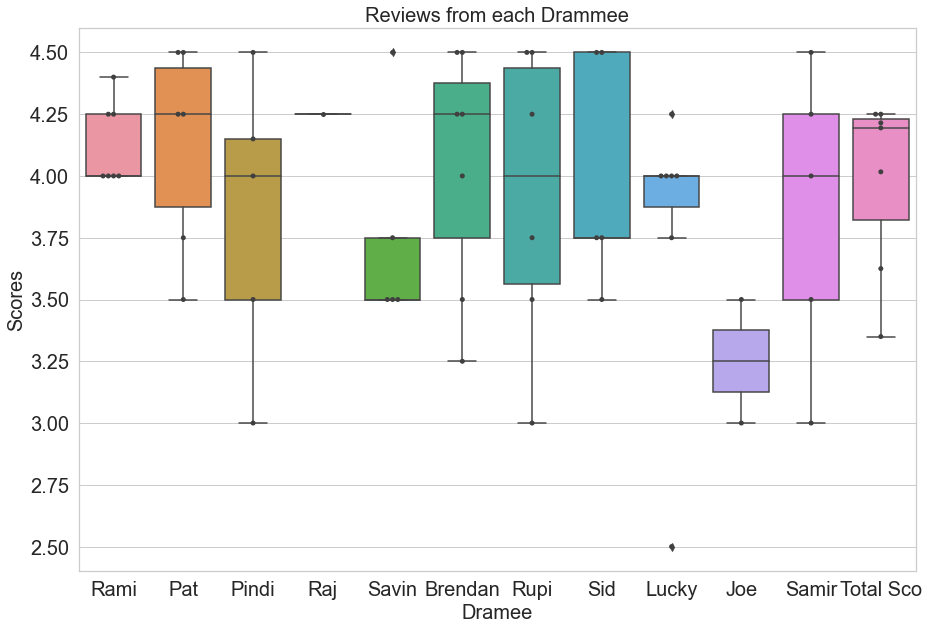

In [28]:
# distribution of each persons reviews
plt.figure()
ax = sns.boxplot(data=dram_data, x='Dramee', y='value')
ax = sns.swarmplot(x="Dramee", y="value", data=dram_data, color=".25")
ax.set_title('Reviews from each Drammee', fontsize=20)
ax.set_ylabel('Scores', fontsize=20)
ax.set_xlabel('Dramee', fontsize=20)
ax.tick_params(labelsize=20)
plt.show()

## Next steps: Covariance matrix

What we need to do now, is find the correlation of reviews between each drammer and every other drammer.
That way, you will know who your ideal drinking buddy is! 
